# Question 1 : When is the best time of day, day of the week, and time of year to fly to minimise delays?


#### Load Neccesary Libraries

In [2]:

import pandas as pd
from datetime import datetime
import sqlite3 as sqlite3
import pyarrow as pa
import pyarrow.csv as pcsv
import numpy as np

#### Read The Data and Connect to database

In [3]:


# Read the data
d1 = pcsv.read_csv("D:/R files/2004.csv").to_pandas()
d2 = pcsv.read_csv("D:/R files/2005.csv").to_pandas()
d3 = pcsv.read_csv("D:/R files/2006.csv").to_pandas()
#plane_data = pcsv.read_csv("D:/R files/plane-data.csv").to_pandas()
airports = pcsv.read_csv("D:/R files/airports.csv").to_pandas()
airports_ = pd.read_csv("D:/R files/airports.csv")
conn = sqlite3.connect("Coursework_1234.db")
c = conn.cursor()

# Remove table if it exists
c.execute('''DROP TABLE IF EXISTS d36''')
# Remove table if it exists
c.execute('''DROP TABLE IF EXISTS airports''')

#use .to_sql to create the tables and data from jupyter to SQL
airports.to_sql('airports', con = conn, index = False)

d1.to_sql('d36', conn, if_exists='append', index=False)
d2.to_sql('d36', conn, if_exists='append', index=False)
d3.to_sql('d36', conn, if_exists='append', index=False)








7141922

The given code is importing required libraries such as pandas, datetime, sqlite3, pyarrow, and pyarrow.csv. It is then reading three CSV files named "2004.csv", "2005.csv", and "2006.csv" using the pyarrow library and converting them to pandas dataframes named d1, d2, and d3 respectively. Another CSV file named "airports.csv" is also read and converted to a pandas dataframe named "airports".

A connection to a SQLite database named "Coursework_1234.db" is established and a cursor object is created to execute SQL commands. The existing tables named "d36" and "airports" are dropped if they already exist.

The "airports" dataframe is then converted into a table named "airports" in the SQLite database using the to_sql method of pandas. The to_sql method is used to insert the data from the "d1", "d2", and "d3" dataframes to the "d36" table in the SQLite database. The if_exists parameter is set to "append" to add data to the table if it already exists, without overwriting it.

Overall, the code reads data from CSV files and inserts them into tables in a SQLite database using pandas and SQLite3 libraries.

In [4]:
q1a = c.execute('''
Select Year,Month,DayofMonth,ArrDelay,DepDelay from d36 where Diverted==0 and Cancelled==0 and ArrDelay is NOT NULL
''').fetchall()

The given code is using the cursor object "c" to execute a SQL query on the SQLite database connected to it. The query is selecting four columns ("Year", "Month", "DayofMonth", and "ArrDelay") from a table named "d36".

In [6]:
#changing q1a from a list to a dataframe which will be used for plotting graphs
q1a_df = (pd.DataFrame(q1a, columns = ['Year','Month','Day','ArrDelay','DepDelay'])) 

In [7]:
# Creating date column from columns 'Year','Month','Day'
q1a_df['date'] = pd.to_datetime(q1a_df[['Year', 'Month', 'Day']], format='%Y%m%d')


In [18]:
# count the number of rows in the dataframe
num_rows = len(q1a_df.index)

mean_delay=q1a_df['ArrDelay'].mean()
dep_delay=q1a_df['DepDelay'].mean()
max_mean_delay=q1a_df['ArrDelay'].max()
max_dep_delay=q1a_df['DepDelay'].max()
number_of_cities=airports_['city'].nunique()
number_of_airports=airports_['airport'].nunique()

# create a new dataframe with the calculated values
summary_df = pd.DataFrame({
    'Number of Rows': [num_rows],
    'Mean Arrival Delay': [mean_delay],
    'Mean Departure Delay': [dep_delay],
    'Maximum Mean Arrival Delay': [max_mean_delay],
    'Maximum Departure Delay': [max_dep_delay],
    'Number of Cities': [number_of_cities],
    'Number of Airports': [number_of_airports]
})
summary_df

,Number of Rows,Mean Arrival Delay,Mean Departure Delay,Maximum Mean Arrival Delay,Maximum Departure Delay,Number of Cities,Number of Airports
0,20984369,7.458288,8.855659,1925.0,1930.0,2675,3245


In [13]:
airports_ = pd.read_csv("D:/R files/airports.csv") 

In [14]:
airports_

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [6]:
#Using Np.Where to assign Season  based on date ('Winter','Fall','Spring','Summer')
q1a_df['season'] = np.where(((q1a_df['date']>='2003-12-21')&(q1a_df['date']<'2004-03-20'))|
                            ((q1a_df['date']>='2004-12-21')&(q1a_df['date']<'2005-03-20'))|
                            ((q1a_df['date']>='2005-12-21')&(q1a_df['date']<'2006-03-20'))|
                            ((q1a_df['date']>='2006-12-21')&(q1a_df['date']<'2007-03-20')), 'Winter',
                            np.where(((q1a_df['date']>='2004-03-20')&(q1a_df['date']<'2004-06-21'))|
                                     ((q1a_df['date']>='2005-03-20')&(q1a_df['date']<'2005-06-21'))|
                                     ((q1a_df['date']>='2006-03-20')&(q1a_df['date']<'2006-06-21')), 'Spring',
                                     np.where(((q1a_df['date']>='2004-06-21')&(q1a_df['date']<'2004-09-23'))|
                                              ((q1a_df['date']>='2005-06-21')&(q1a_df['date']<'2005-09-23'))|
                                              ((q1a_df['date']>='2006-06-21')&(q1a_df['date']<'2006-09-23')), 'Summer',
                                              np.where(((q1a_df['date']>='2004-09-23')&(q1a_df['date']<'2004-12-21'))|
                                                       ((q1a_df['date']>='2005-09-23')&(q1a_df['date']<'2005-12-21'))|
                                                       ((q1a_df['date']>='2006-09-23')&(q1a_df['date']<'2006-12-21')), 'Fall', '1'))))

In [10]:
# Create a new dataframe with the desired columns
#Group by season and in aggreate level get mean of ArrDelay, count of flights based on season and number of flights 
#that are in delay
df_season = q1a_df.groupby('season').agg(mean_delay=('ArrDelay', 'mean'),
                                          total_flights=('ArrDelay', 'count'),
                                          cnt_delay=('ArrDelay', lambda x: x[x > 0].count())).reset_index()

df_season['pct_delay'] = df_season['cnt_delay'] / df_season['total_flights']

In [11]:
df_season

,season,mean_delay,total_flights,cnt_delay,pct_delay
0,Fall,6.542644,5068333,2217503,0.437521
1,Spring,5.988609,5395523,2267185,0.420197
2,Summer,9.161940,5512399,2486884,0.451144
3,Winter,8.093110,5008114,2307458,0.460744


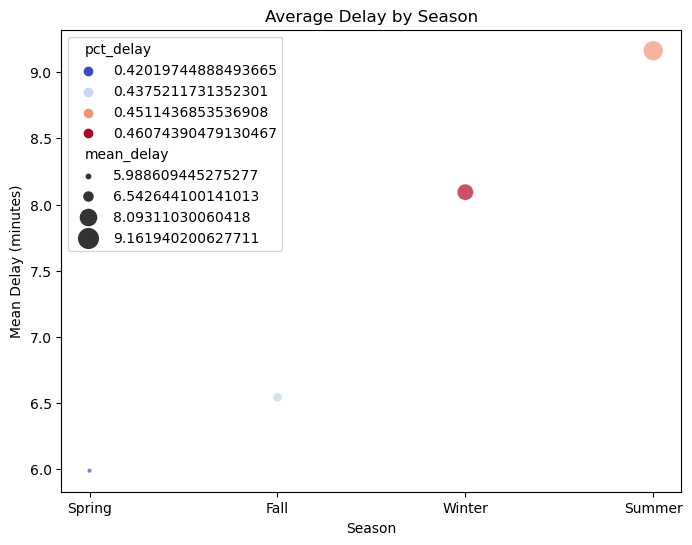

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as gg



# Sort data frame by smallest mean_delay value
df_plot_sorted = df_season.sort_values('mean_delay')

# Create the bubble chart
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot_sorted, x='season', y='mean_delay', size='mean_delay', hue='pct_delay', sizes=(10, 200), palette='coolwarm', alpha=0.7)
plt.title('Average Delay by Season')
plt.xlabel('Season')
plt.ylabel('Mean Delay (minutes)')
plt.xticks(['Winter', 'Spring', 'Summer', 'Fall'])
plt.show()

In [13]:
c.execute('PRAGMA table_info(d36)')

# fetch all rows and print the column types
rows = c.fetchall()
for row in rows:
    print(row[1], row[2])

Year INTEGER
Month INTEGER
DayofMonth INTEGER
DayOfWeek INTEGER
DepTime REAL
CRSDepTime INTEGER
ArrTime REAL
CRSArrTime INTEGER
UniqueCarrier TEXT
FlightNum INTEGER
TailNum TEXT
ActualElapsedTime REAL
CRSElapsedTime INTEGER
AirTime REAL
ArrDelay REAL
DepDelay REAL
Origin TEXT
Dest TEXT
Distance INTEGER
TaxiIn INTEGER
TaxiOut INTEGER
Cancelled INTEGER
CancellationCode TEXT
Diverted INTEGER
CarrierDelay INTEGER
WeatherDelay INTEGER
NASDelay INTEGER
SecurityDelay INTEGER
LateAircraftDelay INTEGER


In [7]:
query = c.execute('''
Select Year,Month,DayofWeek,CRSDepTime,DepTime,ArrDelay from d36 Where Diverted==0
''').fetchall()

In [8]:
#changing df from a list to a dataframe which will be used for plotting graphs
df = (pd.DataFrame(query, columns = ['Year','Month','DayofWeek','CRSDepTime','DepTime','ArrDelay'])) 

In [9]:
# Filter out rows with missing ArrDelay
df_filtered = df[~df['ArrDelay'].isna()]

# Compute mean delay and total flights by DayOfWeek
mean_delay = df_filtered.groupby('DayofWeek')['ArrDelay'].mean().reset_index(name='mean_delay')
total_flights = df_filtered.groupby('DayofWeek').size().reset_index(name='total_flights')
pct_delay = df_filtered[df_filtered['ArrDelay'] > 0].groupby('DayofWeek').size().reset_index(name='cnt_delay')
pct_delay['pct_delay'] = pct_delay['cnt_delay'] / total_flights['total_flights'] * 100

# Merge dataframes
df_plot = mean_delay.merge(total_flights, on='DayofWeek').merge(pct_delay, on='DayofWeek')


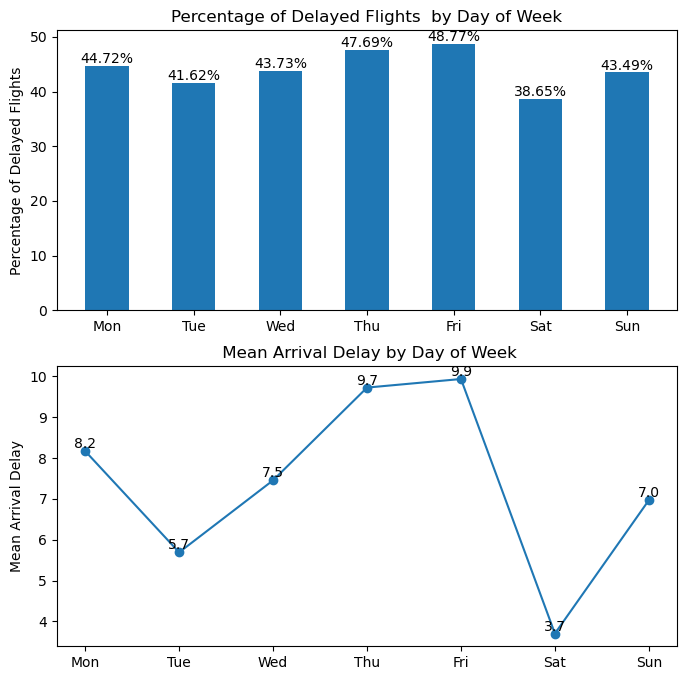

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# create a list of x-axis labels
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# extract the data from the dataframe
pct_delay = df_plot['pct_delay']
mean_delay = df_plot['mean_delay']

# create a figure and axis objects with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# set the bar width
bar_width = 0.5

# create a bar plot on the first axis
ax1.bar(np.arange(len(days)), pct_delay, width=bar_width)

# set the x-tick labels and y-axis label
ax1.set_xticks(np.arange(len(days)))
ax1.set_xticklabels(days)
ax1.set_ylabel('Percentage of Delayed Flights')

# set the plot title
ax1.set_title('Percentage of Delayed Flights  by Day of Week')

# add labels to the bars
for i, v in enumerate(pct_delay):
    ax1.text(i, v, str(round(v, 2)) + '%', ha='center', va='bottom')

# create a line plot on the second axis
ax2.plot(np.arange(len(days)), mean_delay, '-o')

# set the x-tick labels and y-axis label
ax2.set_xticks(np.arange(len(days)))
ax2.set_xticklabels(days)
ax2.set_ylabel('Mean Arrival Delay')


# set the plot title
ax2.set_title(' Mean Arrival Delay by Day of Week')
# add labels to the lines
for i, delay in enumerate(mean_delay):
    ax2.text(i, delay, round(delay, 1), ha='center', va='bottom')

# display the plot
plt.show()

In [18]:
# Filter out rows with missing ArrDelay
df_filtered = df[~df['ArrDelay'].isna()]

# Compute mean delay and total flights by Month
mean_delay = df_filtered.groupby('Month')['ArrDelay'].mean().reset_index(name='mean_delay')
total_flights = df_filtered.groupby('Month').size().reset_index(name='total_flights')
pct_delay = df_filtered[df_filtered['ArrDelay'] > 0].groupby('Month').size().reset_index(name='cnt_delay')
pct_delay['pct_delay'] = pct_delay['cnt_delay'] / total_flights['total_flights'] * 100

# Merge dataframes
df_plot = mean_delay.merge(total_flights, on='Month').merge(pct_delay, on='Month')


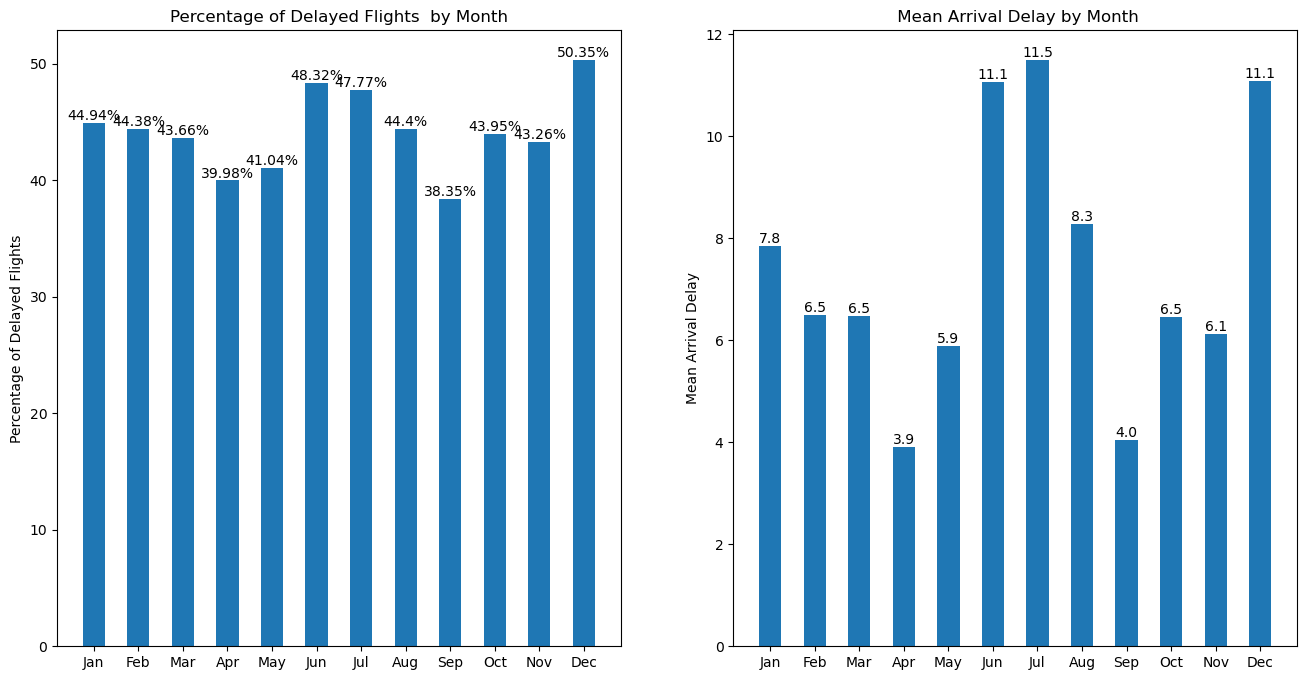

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# create a list of x-axis labels
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# extract the data from the dataframe
pct_delay = df_plot['pct_delay']
mean_delay = df_plot['mean_delay']

# create a figure and axis objects with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# set the bar width
bar_width = 0.5

# create a bar plot on the first axis
ax1.bar(np.arange(len(months)), pct_delay, width=bar_width)

# set the x-tick labels and y-axis label
ax1.set_xticks(np.arange(len(months)))
ax1.set_xticklabels(months)
ax1.set_ylabel('Percentage of Delayed Flights')

# set the plot title
ax1.set_title('Percentage of Delayed Flights  by Month')

# add labels to the bars
for i, v in enumerate(pct_delay):
    ax1.text(i, v, str(round(v, 2)) + '%', ha='center', va='bottom')

# create a line plot on the second axis
ax2.bar(np.arange(len(months)), mean_delay, width=bar_width)

# set the x-tick labels and y-axis label
ax2.set_xticks(np.arange(len(months)))
ax2.set_xticklabels(months)
ax2.set_ylabel('Mean Arrival Delay')


# set the plot title
ax2.set_title(' Mean Arrival Delay by Month')
# add labels to the lines
for i, delay in enumerate(mean_delay):
    ax2.text(i, delay, round(delay, 1), ha='center', va='bottom')

# display the plot
plt.show()
       

In [10]:
# Filter out rows with missing ArrDelay
df = df[~df['ArrDelay'].isna()]
# define a function to convert integer to datetime object
def int_to_datetime(x):
    hour = x // 100
    minute = x % 100
    return datetime(2023, 4, 1, hour, minute)


df['CRSDepTime'] = df['CRSDepTime'].astype(int)

# apply the function to the DepTime column
df['datetime'] = df['CRSDepTime'].apply(int_to_datetime)

# use strftime to extract hour and minute components
df['TimeofDay'] = df['datetime'].apply(lambda x: 'Morning' if 5 < x.hour <= 11 else
                                                  'Noon' if 11 < x.hour <= 17 else
                                                  'Night' if 17 < x.hour <= 24 else
                                                  'Midnight')
df['Group_Hour'] = df['datetime'].apply(lambda x: '0-2 AM' if 0 < x.hour <= 2 else
                                                   '2-4 AM' if 2 < x.hour <= 4 else
                                                   '4-6 AM' if 4 < x.hour <= 6 else
                                                   '6-8 AM' if 6 < x.hour <= 8 else
                                                   '8-10 AM' if 8 < x.hour <= 10 else
                                                   '10-12 AM' if 10 < x.hour <= 12 else
                                                   '12-14 PM' if 12 < x.hour <= 14 else
                                                   '14-16 PM' if 14 < x.hour <= 16 else
                                                   '16-18 PM' if 16 < x.hour <= 18 else
                                                   '18-20 PM' if 18 < x.hour <= 20 else
                                                   '20-22 PM' if 20 < x.hour <= 22 else
                                                   '22-24 PM')

# drop the datetime column if not needed
df.drop('datetime', axis=1, inplace=True)





MemoryError: Unable to allocate 160. MiB for an array with shape (20984369,) and data type int64

In [59]:
# Filter out rows with missing ArrDelay
df_filtered = df[~df['ArrDelay'].isna()]

# Compute mean delay and total flights by DayOfWeek
mean_delay = df_filtered.groupby('Group_Hour')['ArrDelay'].mean().reset_index(name='mean_delay')
total_flights = df_filtered.groupby('Group_Hour').size().reset_index(name='total_flights')
pct_delay = df_filtered[df_filtered['ArrDelay'] > 0].groupby('Group_Hour').size().reset_index(name='cnt_delay')
pct_delay['pct_delay'] = pct_delay['cnt_delay'] / total_flights['total_flights'] * 100

# Merge dataframes
df_plot = mean_delay.merge(total_flights, on='Group_Hour').merge(pct_delay, on='Group_Hour')

In [ ]:
# Sort the DataFrame by total_flights
sorted_total_flights = df_plot.sort_values(by='total_flights')

# Create a bar plot for total_flights
plt.figure(figsize=(12, 5))
plt.bar(sorted_total_flights['Group_Hour'], sorted_total_flights['total_flights'])
plt.title('Total Flights by Group of Hours of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Flights')

# Add labels to the bars
for i, v in enumerate(sorted_total_flights['total_flights']):
    plt.text(i, v, str(v), ha='center', va='bottom')


# Show the plot
plt.show()


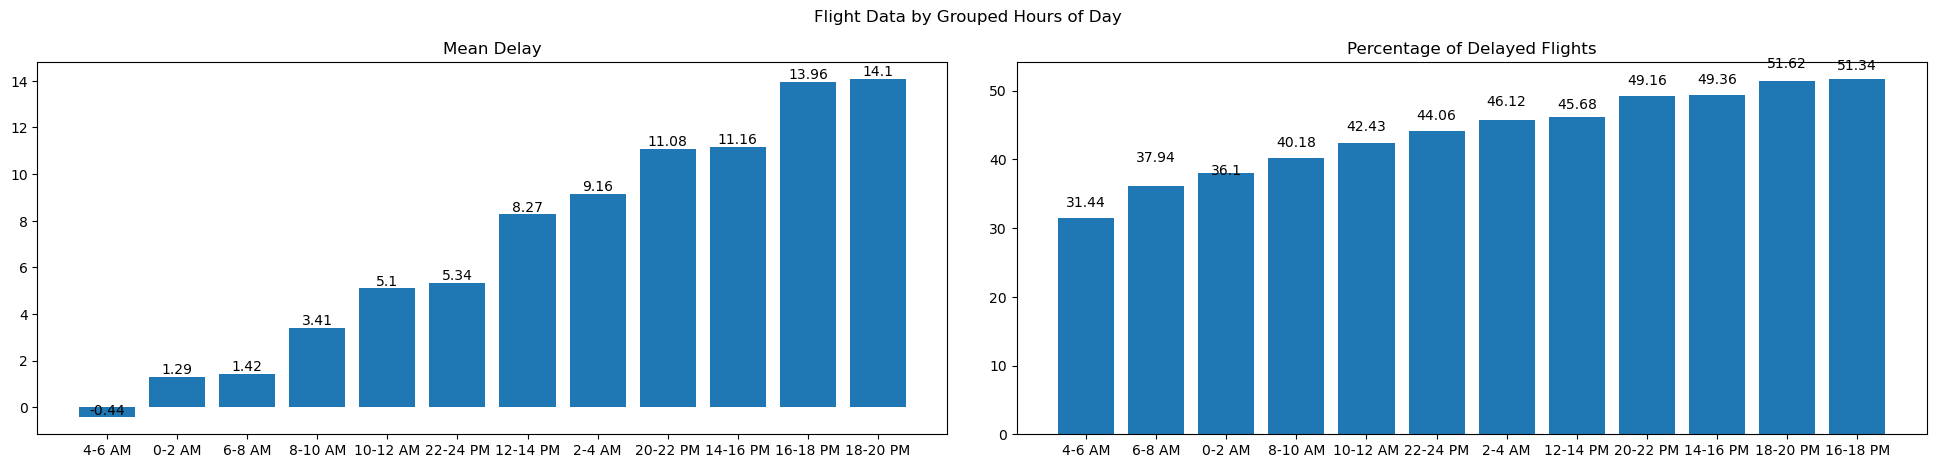

In [90]:

sorted_mean_delay = df_plot.sort_values(by='mean_delay')
sorted_pct_delay = df_plot.sort_values(by='pct_delay')

# Create a figure with 3 axes side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))



# Plot the second bar plot on the second axis
axs[0].bar(sorted_mean_delay['Group_Hour'], sorted_mean_delay['mean_delay'])
axs[0].set_title('Mean Delay')

# Add labels to the bars
for i, v in enumerate(sorted_mean_delay['mean_delay']):
    axs[0].text(i, v, str(round(v, 2)), ha='center', va='bottom')
    
    
# Plot the third bar plot on the third axis
axs[1].bar(sorted_pct_delay['Group_Hour'], sorted_pct_delay['pct_delay'])
axs[1].set_title('Percentage of Delayed Flights')


# Add labels to the bars
for i, v in enumerate(sorted_mean_delay['pct_delay']):
    axs[1].text(i, v+2.3, str(round(v, 2)), ha='center', va='center')

# Adjust the layout of the subplots and add a title
fig.tight_layout(pad=3.0)
plt.suptitle('Flight Data by Grouped Hours of Day')

# Show the plot
plt.show()

In [92]:
# Filter out rows with missing ArrDelay
df_filtered = df[~df['ArrDelay'].isna()]

# Compute mean delay and total flights by DayOfWeek
mean_delay = df_filtered.groupby('TimeofDay')['ArrDelay'].mean().reset_index(name='mean_delay')
total_flights = df_filtered.groupby('TimeofDay').size().reset_index(name='total_flights')
pct_delay = df_filtered[df_filtered['ArrDelay'] > 0].groupby('TimeofDay').size().reset_index(name='cnt_delay')
pct_delay['pct_delay'] = pct_delay['cnt_delay'] / total_flights['total_flights'] * 100

# Merge dataframes
df_plot = mean_delay.merge(total_flights, on='TimeofDay').merge(pct_delay, on='TimeofDay')

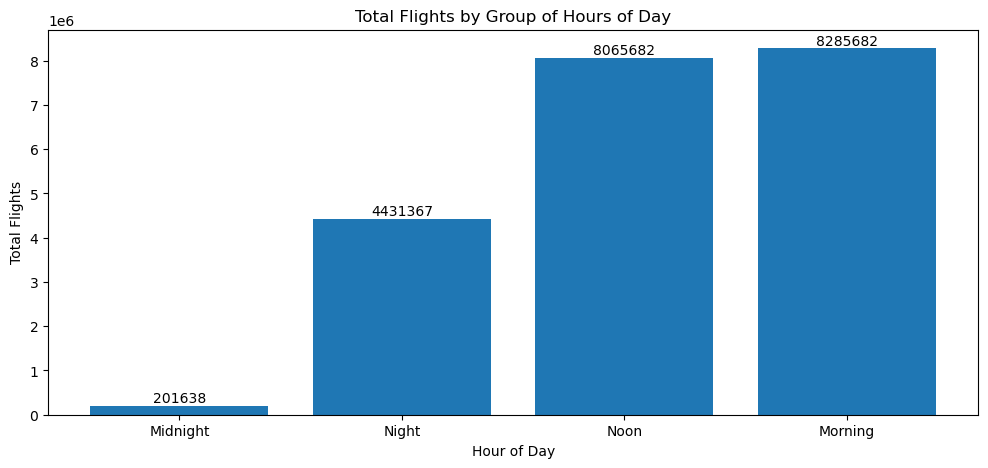

In [94]:
# Sort the DataFrame by total_flights
sorted_total_flights = df_plot.sort_values(by='total_flights')

# Create a bar plot for total_flights
plt.figure(figsize=(12, 5))
plt.bar(sorted_total_flights['TimeofDay'], sorted_total_flights['total_flights'])
plt.title('Total Flights by Group of Hours of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Flights')

# Add labels to the bars
for i, v in enumerate(sorted_total_flights['total_flights']):
    plt.text(i, v, str(v), ha='center', va='bottom')


# Show the plot
plt.show()


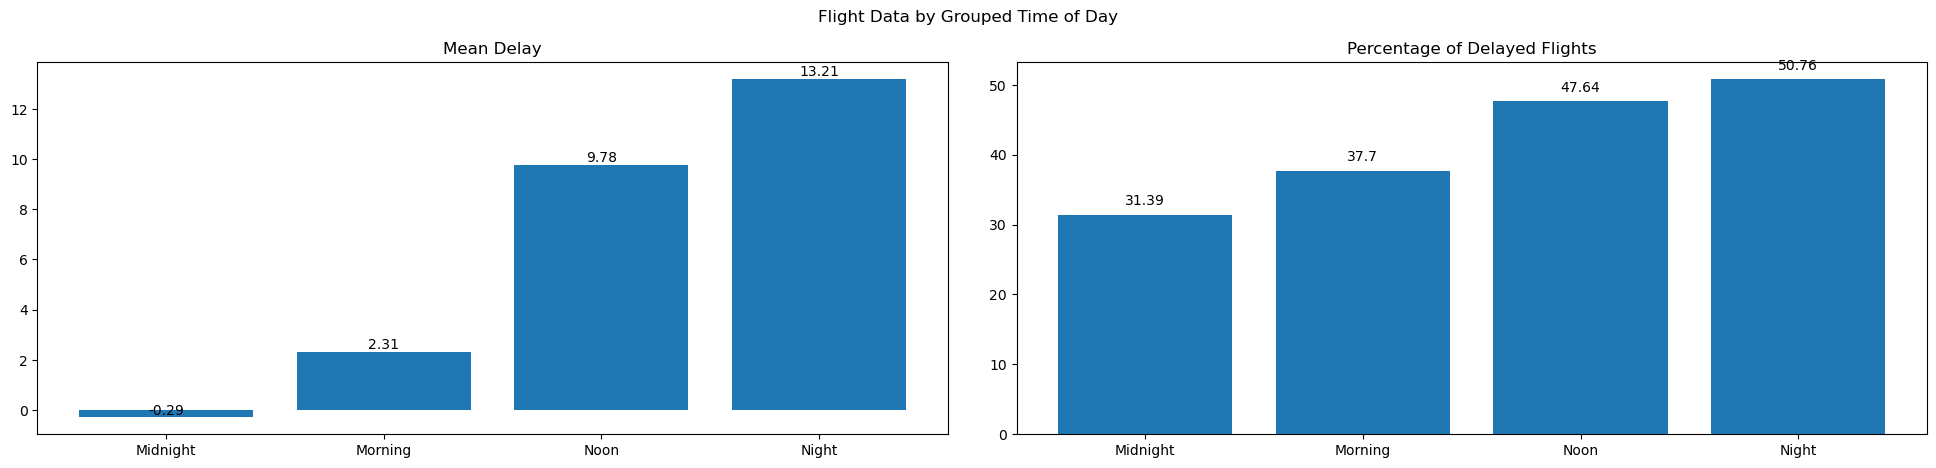

In [97]:

sorted_mean_delay = df_plot.sort_values(by='mean_delay')
sorted_pct_delay = df_plot.sort_values(by='pct_delay')

# Create a figure with 3 axes side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 5))



# Plot the second bar plot on the second axis
axs[0].bar(sorted_mean_delay['TimeofDay'], sorted_mean_delay['mean_delay'])
axs[0].set_title('Mean Delay')

# Add labels to the bars
for i, v in enumerate(sorted_mean_delay['mean_delay']):
    axs[0].text(i, v, str(round(v, 2)), ha='center', va='bottom')
    
    
# Plot the third bar plot on the third axis
axs[1].bar(sorted_pct_delay['TimeofDay'], sorted_pct_delay['pct_delay'])
axs[1].set_title('Percentage of Delayed Flights')


# Add labels to the bars
for i, v in enumerate(sorted_mean_delay['pct_delay']):
    axs[1].text(i, v+2, str(round(v, 2)), ha='center', va='center')

# Adjust the layout of the subplots and add a title
fig.tight_layout(pad=3.0)
plt.suptitle('Flight Data by Grouped Time of Day')

# Show the plot
plt.show()